## Математика и алгоритмы для машинного обучения  ML-3A. Регрессия 

Задание 4.2

Найдите следующий шаг градиентного спуска. Текущая модель: y=2x.

Обучающая выборка:

x |	y
-- |--
1 |	2
2	| 5

Темп обучения (learning rate): 1/6
Ответ будет выглядеть как y=kx+b, где k и b вы считаете самостоятельно. Дроби округлите до сотых, разделив точкой.

Подготовка к решению этой задачи выглядит так
1. Имеем матрицу признаков X и вектор правильных ответов Y
2. Предполагаем что модель линейной регрессии выглядит как
     y = kx+b (где k и b это веса при признаках, или как мы их раньше называли w1 и w0) (Для справки: MATH2. Линейная алгебра. Часть II 7. Классическая OLS линейная регрессия)
3.  Начальная точка у нас предложена в текущей модели - y = 2x, то есть стартуем с точки (2,0)
4. Добавляем к матрице признаков X - столбец единиц, чтобы учесть смещение (свободный коэффициент), умножаем на вектор весов и приравниваем к вектору правильных ответов
5. Для получившейся системы находим следующий шаг градиентного спуска по формуле из теории - где n = 2 это количество наблюдений (строк), а a=1/6, это темп обучения.

Остается подставить все переменные в формулу, сначала вычислить сумму по строкам и затем получить Bk как вектор из двух компонент - координату точки - следующий шаг градиентного спуска 

y = b1*x + bx

Матрица признаков $x = \begin{pmatrix} 1 \\ 2 \end{pmatrix}$

Добавим к ней столбец единиц, чтобы учесть слагаемое b2:

 $X =
 \begin{pmatrix}
  1 & 1\\
  2 & 1
 \end{pmatrix}, 
 b = \begin{pmatrix} b1 \\ b2 \end{pmatrix},
 y = \begin{pmatrix} 2 \\ 5 \end{pmatrix}$

 $Xb = y, \begin{pmatrix}
  1 & 1\\
  2 & 1
 \end{pmatrix}
 \begin{pmatrix} b1 \\ b2 \end{pmatrix} =
 \begin{pmatrix} 2 \\ 5 \end{pmatrix}$

 Формула обновления весов в случае квадратичной функции потерь L(X, b):

 b(k) = b(k-1) - a*(1/n) SUM (2x^T_i(x_i*b(k-1) - yi)

 где b(k-1) - вектор весов на текущей итерации

 b(k) - вектор весов на новой итерации

 a - темп обучения

В нашем случае: b(k-1) = (2 0), a = 1/6, r = 2, x_i = i-я строка матрицы признаков

In [27]:
import numpy as np

In [90]:
2*(x.dot(x.dot(b_prev) - y))

array([[0.02913889],
       [0.10542548]])

In [139]:
def next_step(x, y, prev_step, learn_rate):
    # sums = 2*sum([(x[i, :] * (x[i, :].dot(prev_step) - y[i][0])) for i in range(x.shape[0])])
    # можно упростить с помощью матричного умножения, но результат чуть другой
    prev_step = prev_step.copy()
    sums = 2*(x.T.dot(x.dot(prev_step) - y))
    new_step = prev_step - learn_rate * (1/x.shape[0]) * sums.reshape((2,1))
    return new_step

# для сравнения от автора курса - тут нет умножения на 2
# функция цикла градиентного спуска с доп. параметрами
# начального вектора theta и числа итераций
def optimize(X, y, start_theta, alpha, n_iters):
    theta = start_theta.copy()
    n = X.shape[0]
    for i in range(n_iters):
        # вычисление градиента функции MSE
        theta_grad = 1. / n * X.transpose().dot(X.dot(theta) - y)
        # градиентный шаг
        theta = theta - alpha * theta_grad
    return theta

print(optimize(x, y, b_prev, l_rate, 100))

x = np.array([[1, 1], 
              [2, 1 ]
              ])
y = np.array([[2],
              [5]
              ])
b_prev = np.array([[2], [0]])
l_rate = 1/6

for i in range(100):
        b_prev = next_step(x, y, b_prev, l_rate)

print(b_prev)

# модель после 1 итерации: y=2.33x+0.17
# этот ответ принят
# идеальная модель y=3x-1, после 100 итераций получаю:

[[ 2.79224431]
 [-0.66384423]]
[[ 2.93828285]
 [-0.90013955]]


## 5. Линейная регрессия. Предобработка

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(suppress=True)
%matplotlib inline

In [2]:
data = pd.read_csv('data_flats2.csv', sep =';')
data.head()

,id,full_sq,life_sq,floor,preschool_education_centers_raion,school_education_centers_raion,school_education_centers_top_20_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25_raion,shopping_centers_raion,metro_km_walk,kindergarten_km,school_km,park_km,green_zone_km,mkad_km,bulvar_ring_km,kremlin_km,price_doc
0,1,43,27.0,4.0,5,5,0,0,7,3,0,16,1.131260,0.145700,0.177975,2.158587,0.600973,1.422391,13.675657,15.156211,5850000
1,2,34,19.0,3.0,5,8,0,0,6,1,1,3,0.635053,0.147754,0.273345,0.550690,0.065321,9.503405,8.132640,8.698054,6000000
2,3,43,29.0,2.0,4,7,0,0,5,1,0,0,1.445960,0.049102,0.158072,0.374848,0.453172,5.604800,8.054252,9.067885,5700000
3,4,89,50.0,9.0,9,10,0,0,17,6,0,11,0.963802,0.179441,0.236455,0.078090,0.106125,2.677824,18.309433,19.487005,13100000
4,5,77,77.0,4.0,7,9,0,2,25,2,0,10,0.688859,0.247901,0.376838,0.258289,0.236214,11.616653,0.787593,2.578671,16331452


In [3]:
data.isnull().sum()

id                                          0
full_sq                                     0
life_sq                                  6383
floor                                     167
preschool_education_centers_raion           0
school_education_centers_raion              0
school_education_centers_top_20_raion       0
university_top_20_raion                     0
sport_objects_raion                         0
additional_education_raion                  0
culture_objects_top_25_raion                0
shopping_centers_raion                      0
metro_km_walk                              25
kindergarten_km                             0
school_km                                   0
park_km                                     0
green_zone_km                               0
mkad_km                                     0
bulvar_ring_km                              0
kremlin_km                                  0
price_doc                                   0
dtype: int64

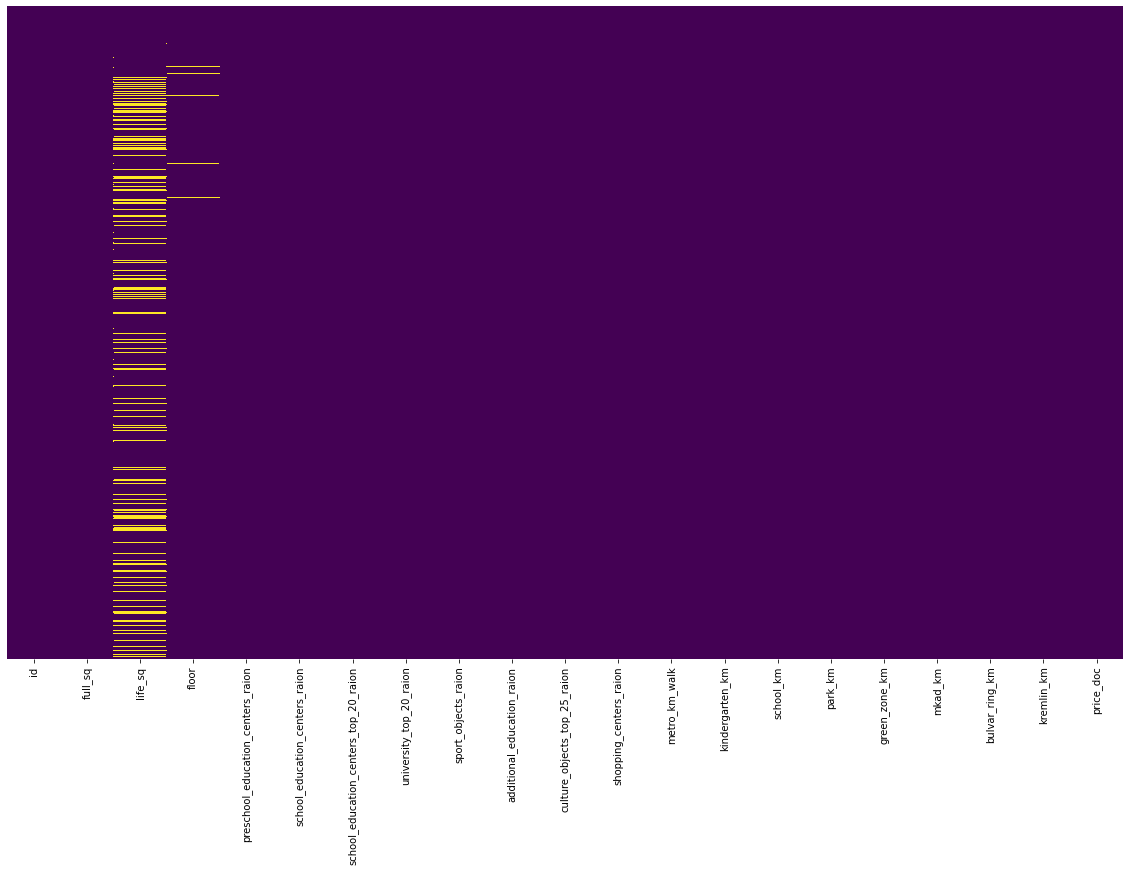

In [4]:
# оценить визуально количество пропусков и их распределение
import seaborn as sns
fig, ax = plt.subplots(figsize=(20,12))
sns_heatmap = sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

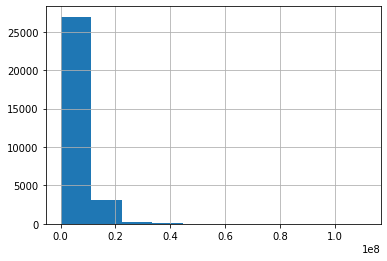

In [5]:
# распределение целевой переменной
data.price_doc.hist()

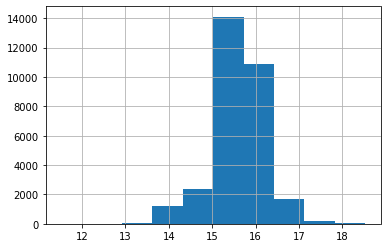

In [6]:
# Много квартир в среднем сегменте, но очень мало дорогих квартир. 
# На практике часто в таких случаях логорифмируют переменную, чтобы уменьшить перепады и сгладить хвост
data['price_doc'] = data['price_doc'].apply(lambda w: np.log(w + 1))
data.price_doc.hist()

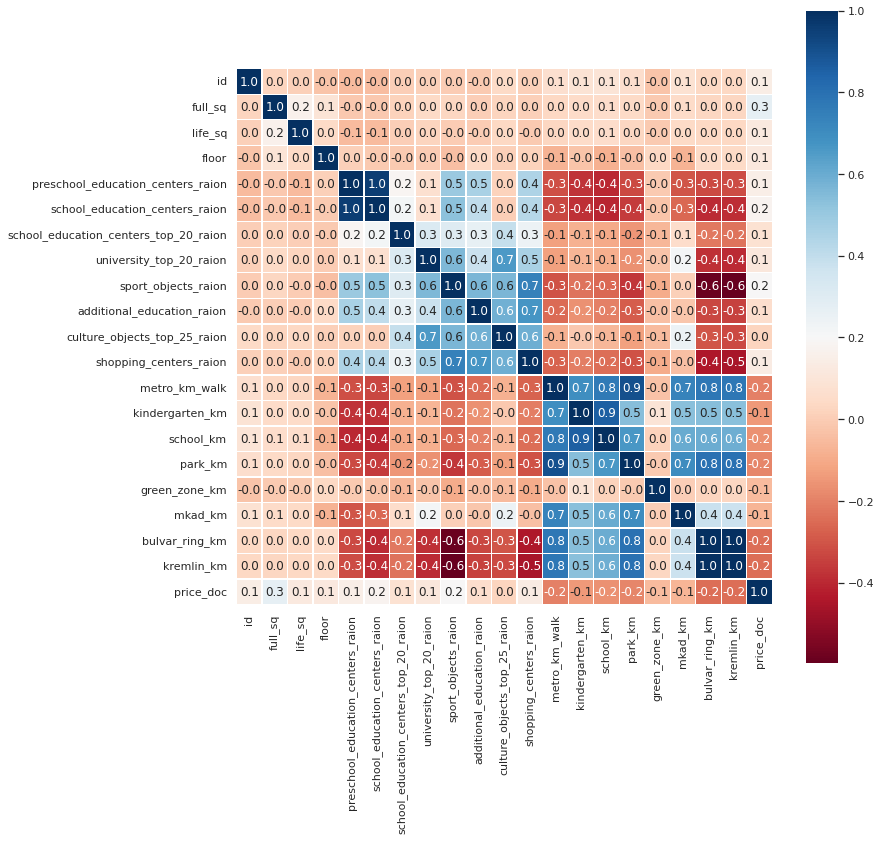

In [7]:
# проверить, нет ли мультиколлинеарности — сильной взаимосвязи между независимыми признаками
sns.set(font_scale=1)
plt.subplots(figsize=(12, 12))
sns.heatmap(data.corr(), square=True,
              annot=True, fmt=".1f", linewidths=0.1, cmap="RdBu")

In [ ]:
# Смотрим, у каких пар признаков сильная взаимосвязь:
# -Количество школ и количество детских садов. 
#   логично, так как в Москве детские сады обычно присоединены к школам. 
#   Оставляем школы, т.к. у этого признака больше взаимосвязь с целевой переменной.
#-Расстояние до школ и расстояние до детских садов. 
#   По сути, это естественным образом вытекает из предыдущего пункта. Оставляем расстояние до школ.
#-Расстояние до парка и до метро. 
#   Рассуждая аналогично предыдущим парам, оставляем расстояние до метро.
#-Расстояние до Кремля и до бульварного кольца. 
#   У них коэффициент корреляции равен 1, и их корреляция с целевой переменной одинаковая. 
#   Поэтому можем убрать любой признак. Убираем расстояние до Кремля.
# надо убрать пять признаков - 4 из-за мультиколлинеарности и жилую площадь, тк там много пропусков

In [10]:
to_drop = ['life_sq',
           'preschool_education_centers_raion',
           'kindergarten_km',
           'park_km',
           'kremlin_km'
           ]

In [11]:
print(data.shape)
data = data.drop(to_drop, axis=1)
print(data.shape)

(30469, 21)
(30469, 16)


## Задание 5.1

In [ ]:
# Удалите строки, где есть хотя бы один пропуск. 
# Обучите линейную регрессию, взяв тестовую выборку размера 0.2, random_state=77.
# Нормализуйте отобранные признаки для тестовой и для обучающей выборки отдельно с помощью 
# функции RobustScaler() (функция, которая подобна известным вам методам нормализации, 
# однако использует медианы и квантили для вычисления, поэтому не чувствительна к выбросам 
# и может приводить к лучшим результатам). 
# Не забудьте, что id не несет никакой содержательной информации, поэтому не надо брать его в качестве предиктора
# Вычислите MSE, ответ запишите с точностью до сотых. 
# Также не забудьте, что мы логарифмировали зависимую переменную, а значит при подсчете MSE необходимо найти 
# экспоненциальную функцию от y! 
# Округлите ответ до целых.


In [13]:
# Удалите строки, где есть хотя бы один пропуск. 
print(data.shape)
data = data.dropna(axis=0)
print(data.shape)

(30469, 16)
(30277, 16)


In [85]:
# Обучите линейную регрессию, взяв тестовую выборку размера 0.2, random_state=77.
# Нормализуйте отобранные признаки для тестовой и для обучающей выборки отдельно с помощью 
# функции RobustScaler() 
# id не надо брать его в качестве предиктора
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline

In [14]:
data = data.drop(['id'], axis=1)
print(data.shape)

(30277, 15)


In [15]:
data.columns

Index(['full_sq', 'floor', 'school_education_centers_raion',
       'school_education_centers_top_20_raion', 'university_top_20_raion',
       'sport_objects_raion', 'additional_education_raion',
       'culture_objects_top_25_raion', 'shopping_centers_raion',
       'metro_km_walk', 'school_km', 'green_zone_km', 'mkad_km',
       'bulvar_ring_km', 'price_doc'],
      dtype='object')

In [51]:
X = data[data.columns[:-1]]
y = data['price_doc']
print(X.shape, y.shape)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=77)

scaler = RobustScaler()
reg = LinearRegression()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
reg.fit(X_train_scaled, y_train)
reg.score(X_test_scaled, y_test)

(30277, 14) (30277,)


0.202733345985589

In [53]:
# Вычислите MSE, ответ запишите с точностью до сотых. 
# Также не забудьте, что мы логарифмировали зависимую переменную, а значит при подсчете MSE необходимо найти 
# экспоненциальную функцию от y  ( data['price_doc'].apply(lambda w: np.log(w + 1)))
# Округлите ответ до целых
pred = reg.predict(X_test_scaled)
mean_squared_error(np.exp(y_test)-1, np.exp(pred)-1)
# 16647931507746.967

16647931507746.967

In [55]:
(((np.exp(y_test)-1) - (np.exp(pred)-1)) ** 2).mean()

16647931507746.982

In [56]:
pipe = Pipeline(
    [('scaler', RobustScaler()), 
     ('reg', LinearRegression())
     ])
pipe.fit(X_train, y_train)
print(pipe.score(X_test, y_test))
pred = pipe.predict(X_test)
print(mean_squared_error(np.exp(y_test)-1, np.exp(pred)-1))

0.20307012094081323
16818684371715.055


In [7]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.metrics import (
    mean_squared_error, f1_score, accuracy_score, 
    roc_curve, roc_auc_score)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from matplotlib import pyplot as plt

## 1. Линейная регрессия. Реализация

In [140]:
with warnings.catch_warnings():
    warnings.filterwarnings("ignore")
    data = load_boston()
data['data'].shape

(506, 13)

In [3]:
print(data['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

### 1.1. Реализация линейной регрессии с использованием матричных операций

Линейная регрессия выражается следующей зависимостью:
$$y=X\theta+\epsilon,$$
где $X$ — матрица объекты-признаки, $y$ — вектор целевых значений, соответствующих $X$, $\theta$ — параметр линейной регрессии, $\epsilon$ — некоторый шум.

Из данного следует выражение для $\theta$ как:
$$X^Ty=X^TX\theta \rightarrow \theta=(X^TX)^{-1}X^Ty$$

Реализуем выражение для $\theta$ с помощью операций линейной алгебры библиотеки Numpy:

In [4]:
# ЗАДАЧА Реализовать функцию, осуществляющую матричные операции для получения theta
def linreg_linear(X, y):
    theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    return theta

In [5]:
# Подготовить данные
X, y = data['data'], data['target']

X = np.hstack([np.ones(X.shape[0])[:, np.newaxis], X])

In [28]:
# Вычислить параметр theta
theta = linreg_linear(X, y)

In [29]:
# Сделать предсказания для тренировочной выборки
y_pred = X.dot(theta)

In [6]:
def print_regression_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    print(f'MSE = {mse:.2f}, RMSE = {rmse:.2f}')

In [31]:
# Задание 6.1. Посчитать значение ошибок MSE и RMSE для тренировочных данных
print_regression_metrics(y, y_pred)

MSE = 21.89, RMSE = 4.68


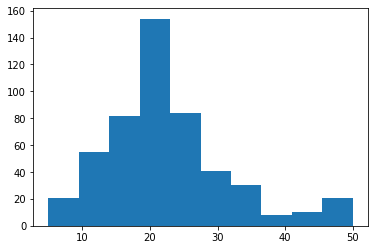

In [32]:
plt.hist(y);

In [33]:
# Разбить выборку на train/valid, вычислить theta,
# сделать предсказания и посчитать ошибки MSE и RMSE
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2)
theta = linreg_linear(X_train, y_train)
y_pred = X_valid.dot(theta)
y_train_pred = X_train.dot(theta)

In [34]:
print_regression_metrics(y_valid, y_pred)
print_regression_metrics(y_train, y_train_pred)

MSE = 20.76, RMSE = 4.56
MSE = 22.45, RMSE = 4.74


In [36]:
# Задание 6.2
# Постройте модель при помощи sklearn. Используйте параметры по умолчанию, обучите на 
# всей выборке и посчитайте RMSE.
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X,y)
y_pred = lr.predict(X)
print_regression_metrics(y, y_pred)

MSE = 21.89, RMSE = 4.68


In [46]:
# Задание 6.3
# У какого из признаков наибольшее стандартное отклонение? Чему оно равно? округлите до сотых
round(X.std(axis=0).max(), 2)

168.37

In [54]:
# Задание 6.4
# Обучите регрессию без дополнительного столбца единиц. Какой получился RMSE?
lr = LinearRegression()
lr.fit(X[:, 1:], y)
y_pred = lr.predict(X[:, 1:])
print_regression_metrics(y, y_pred)

MSE = 21.89, RMSE = 4.68


In [59]:
# Задание 6.5
# Очистите данные от строк, где значение признака B меньше 50. Какой получился RMSE?
# idx 11 - если не брать колонку единиц, idx 12 в противном случае
# сначала с единицами
filter = X[:, 12] >= 50
X_filtered = X[filter]
y_filtered = y[filter]
print(X.shape)
print(X_filtered.shape)
print(y_filtered.shape)
lr = LinearRegression()
lr.fit(X_filtered, y_filtered)
y_pred = lr.predict(X_filtered)
print_regression_metrics(y_filtered, y_pred)
# ответ подошел

(506, 14)
(486, 14)
(486,)
MSE = 21.79, RMSE = 4.67


In [145]:
# Задание 6.6
# Нормализуйте признаки и обучите линейную регрессию матричным методом. Какой получился RMSE?
import warnings

with warnings.catch_warnings():
    warnings.filterwarnings("ignore")
    data = load_boston()

X, y = data['data'], data['target']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = np.hstack([np.ones(X_scaled.shape[0])[:, np.newaxis], X])
# Вычислить параметр theta
theta = linreg_linear(X_scaled, y)
# Сделать предсказания для тренировочной выборки
y_pred = X_scaled.dot(theta)
print_regression_metrics(y, y_pred)

MSE = 21.89, RMSE = 4.68


### 1.2. Реализация линейной регрессии с использованием методов оптимизации

Для реализации линейной регрессии с помощью методов оптимизации будем использовать функцию ошибки **среднего квадратичного** ([Mean Squared Error](https://en.wikipedia.org/wiki/Mean_squared_error)), которая является выпуклой функцией в n-мерном пространстве $\mathbb{R}^n$ и в общем виде выглядит следующим образом:
$$MSE = \frac{1}{n} * \sum_{i=1}^{n}{(y_i - a(x_i))^2}.$$
Здесь $x_i$ — вектор-признак $i$-го объекта обучающей выборки, $y_i$ — истинное значение для $i$-го объекта, $a(x)$ — алгоритм, предсказывающий для данного объекта $x$ целевое значение, $n$ — кол-во объектов в выборке.

В случае линейной регрессии $MSE$ представляется как:
$$MSE(X, y, \theta) = \frac{1}{2n} * \sum_{i=1}^{n}{(y_i - \theta^Tx_i)^2} = \frac{1}{2n} \lVert{y - X\theta}\rVert_{2}^{2}=\frac{1}{2n} (y - X\theta)^T(y - X\theta),$$
где $\theta$ — параметр модели линейной регрессии, $X$ — матрица объекты-признаки, $y$ - вектор истинных значений, соответствующих $X$.

Возьмем первый вариант представления функции ошибки и посчитаем ее градиент по параметру $\theta$, предварительно переименовав $MSE$ в $L$:
$$L=\frac{1}{2n} * \sum_{i=1}^{n}{(y_i - \theta^Tx_i)^2}$$
$$\nabla L = \frac{1}{n}\sum_{i=1}^{n}{(\theta^Tx_i - y_i) \cdot x_i} = \frac{1}{n}X^T(X\theta - y)$$

Исходя из полученного выражения градиента, реализуем алгоритм градиентного спуска:

In [119]:
# Реализовать функцию вычисления градиента функции MSE
def calc_mse_gradient(X, y, theta):
    n = X.shape[0]
    grad = 1. / n * X.transpose().dot(X.dot(theta) - y)
    
    return grad

In [120]:
# Реализовать функцию, осуществляющую градиентный шаг
# (функция должна содержать параметр величины шага alpha - learning rate)
def gradient_step(theta, theta_grad, alpha):
    return theta - alpha * theta_grad

In [121]:
# Реализовать функцию цикла градиентного спуска с доп. параметрами
# начального вектора theta и числа итераций
def optimize(X, y, grad_func, start_theta, alpha, n_iters):
    theta = start_theta.copy()
    
    for i in range(n_iters):
        theta_grad = grad_func(X, y, theta)
        theta = gradient_step(theta, theta_grad, alpha)
    
    return theta

In [ ]:
# Разбить таблицу данных на матрицы X и y
X, y = data['data'], data['target']

# Добавить фиктивный столбец единиц (bias линейной модели)
X = np.hstack([np.ones(X.shape[0])[:, np.newaxis], X])
m = X.shape[1]

In [ ]:
# Оптимизировать параметр линейной регрессии theta на всех данных
theta = optimize(X, y, calc_mse_gradient, np.ones(m), 0.001, 100)

In [ ]:
theta

array([7.41647399e+246, 3.32349992e+247, 7.39564172e+247, 8.96295209e+247,
       5.07578059e+245, 4.22030567e+246, 4.63094053e+247, 5.29083888e+248,
       2.65643383e+247, 8.19991211e+247, 3.27135991e+249, 1.38363846e+248,
       2.64323053e+249, 9.88835598e+247])

In [ ]:
# Проверить максимальные значения по каждому признаку в данных
X.max(axis=0)

array([  1.    ,  88.9762, 100.    ,  27.74  ,   1.    ,   0.871 ,
         8.78  , 100.    ,  12.1265,  24.    , 711.    ,  22.    ,
       396.9   ,  37.97  ])

In [ ]:
print(data['feature_names'][np.argmax(X.std(axis=0)) + 1])
print(np.max(X.std(axis=0)))

B
168.3704950393814


In [ ]:
# Нормализовать даннные с помощью стандартной нормализации
X, y = data['data'], data['target']
X = (X - X.mean(axis=0)) / X.std(axis=0)

In [ ]:
# Добавить фиктивный столбец единиц (bias линейной модели)
X = np.hstack([np.ones(X.shape[0])[:, np.newaxis], X])
X.max(axis=0)

array([1.        , 9.9339306 , 3.80423444, 2.42256516, 3.66839786,
       2.73234648, 3.55504427, 1.11749449, 3.96051769, 1.66124525,
       1.79819419, 1.63882832, 0.44105193, 3.54877081])

In [ ]:
# Оптимизировать theta на новых данных
theta = optimize(X, y, calc_mse_gradient, np.ones(m), 0.01, 5000)

In [ ]:
theta

array([ 2.25328063e+01, -9.21740195e-01,  1.07033639e+00,  1.06388396e-01,
        6.86667316e-01, -2.05006416e+00,  2.68062168e+00,  1.40667969e-02,
       -3.10608483e+00,  2.57511475e+00, -1.97802851e+00, -2.05725099e+00,
        8.48690321e-01, -3.74025884e+00])

In [ ]:
# Сделать предсказания при полученных параметрах
y_pred = X.dot(theta)

In [ ]:
# Посчитать значение ошибок MSE и RMSE для тренировочных данных
print_regression_metrics(y, y_pred)

MSE = 21.90, RMSE = 4.68


In [ ]:
# Разбить выборку на train/valid, оптимизировать theta,
# сделать предсказания и посчитать ошибки MSE и RMSE

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2)
theta = optimize(X_train, y_train, calc_mse_gradient, np.ones(m), 0.01, 5000)
y_pred = X_valid.dot(theta)

print_regression_metrics(y_valid, y_pred)

MSE = 20.44, RMSE = 4.52
